In [230]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [231]:
df = pd.read_csv("Cancer_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [232]:
df = df.drop(labels=["Unnamed: 32", "id"], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [233]:
numeric_df = df.select_dtypes(include=["number"])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[~(((numeric_df < Q1 - 1.5 * IQR) | (numeric_df > Q3 + 1.5 * IQR))).any(axis=1)]
df = filtered_df
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [234]:
encoder = LabelEncoder()
df["diagnosis"] = encoder.fit_transform(df["diagnosis"])
df

C:\Users\pc\AppData\Local\Temp\ipykernel_16600\2472254715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diagnosis"] = encoder.fit_transform(df["diagnosis"])


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


# Preprocessing

In [235]:
correlation_matrix = df.corr()

threshold = 0.95
high_corr_pairs = [
    [col1, col2]
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold and col1 != "diagnosis" and col2 != "diagnosis"
]

unique_list = []  
for item in high_corr_pairs:
    if item not in unique_list:
        unique_list.append(sorted(item))

seen = set()
unique_sub_lists = []

for sub_list in unique_list:
    if not any(element in seen for element in sub_list):
        unique_sub_lists.append(sub_list)
        seen.update(sub_list)

unique_list = np.array(unique_sub_lists)

print(f"The {len(unique_list)} relation of features:")
print("\n".join(map(str, unique_list)))

The 4 relation of features:
['perimeter_mean' 'radius_mean']
['area_mean' 'radius_worst']
['perimeter_se' 'radius_se']
['area_worst' 'perimeter_worst']


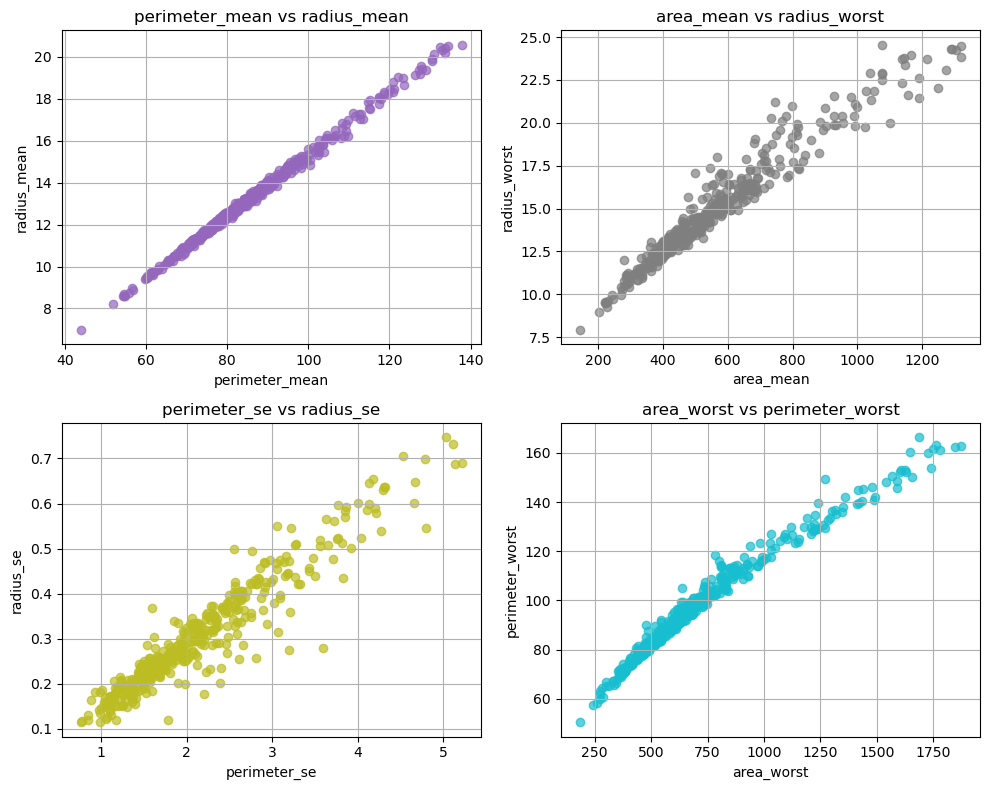

In [236]:
rows, cols = 2, len(unique_list) // 2

fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
axes = axes.flatten()
colors = list(mcolors.TABLEAU_COLORS)

for i, (x_feat, y_feat) in enumerate(unique_list):
    ax = axes[i]
    ax.scatter(df[x_feat], df[y_feat], alpha=0.7, color=colors[np.random.randint(0, len(colors))])
    ax.set_title(f'{x_feat} vs {y_feat}')
    ax.set_xlabel(x_feat)
    ax.set_ylabel(y_feat)
    ax.grid(True)

for j in range(len(unique_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [237]:
dfc = df.copy()
for sub_list in unique_list:
    combined_name = f"combined-{sub_list[0]}-{sub_list[1]}"
    dfc[combined_name] = (dfc[sub_list[0]] / dfc[sub_list[1]]) / 10
    dfc = dfc.drop(columns=sub_list)
dfc

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,combined-perimeter_mean-radius_mean,combined-area_mean-radius_worst,combined-perimeter_se-radius_se,combined-area_worst-perimeter_worst
6,1,19.98,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.7732,53.91,...,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0.655342,4.545455,0.711887,1.048303
7,1,20.83,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,1.3770,50.96,...,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0.657914,3.387456,0.660840,0.811031
10,1,23.24,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,1.1870,40.51,...,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0.641074,4.157374,0.649802,0.928918
11,1,17.89,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,0.9849,54.16,...,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0.656527,3.824682,0.704626,0.951648
13,1,23.95,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,1.0780,36.58,...,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0.654259,4.647862,0.719812,0.782589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,28.92,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,1.3600,16.83,...,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242,0.640528,3.702664,0.709830,0.670531
555,0,27.61,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,2.2390,14.46,...,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283,0.638192,2.964945,0.653479,0.514015
558,0,22.68,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,1.1080,19.54,...,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,0.660658,4.244832,0.986690,0.692635
560,0,27.15,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,1.4920,29.84,...,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321,0.650391,3.924183,0.792318,0.705289


In [238]:
dfc.dropna(axis=0, how="any", inplace=True)
y = dfc["diagnosis"]
dfc = dfc.drop("diagnosis", axis=1)

In [239]:
X = dfc.values
feature_x_train, feature_x_test, feature_y_train, feature_y_test = train_test_split(X, y, test_size=0.2)
feature_y_train

246    0
49     0
109    0
248    0
284    0
      ..
74     0
307    0
200    0
93     0
225    0
Name: diagnosis, Length: 318, dtype: int32

In [240]:
importanceFeaturesChecker = RandomForestClassifier()
importanceFeaturesChecker.fit(feature_x_train, feature_y_train)

importance = importanceFeaturesChecker.feature_importances_
importance

array([0.03479868, 0.00900673, 0.01678036, 0.10503036, 0.13239847,
       0.00690636, 0.01526332, 0.011488  , 0.09243005, 0.00640633,
       0.00692468, 0.00849103, 0.01107326, 0.00808305, 0.01111669,
       0.02699632, 0.01562356, 0.01684065, 0.07828567, 0.09306225,
       0.01103487, 0.01132823, 0.05774156, 0.02189174, 0.00929416,
       0.18170361])

In [241]:
columns = dfc.columns
importance_features = [columns[i] for i in range(len(importance)) if importance[i] > 0.02]
print(" ,".join(importance_features))
print(f"Just {len(importance_features)} of features are useful for our training.")
print("Unimportance features make our model overfitted.")

texture_mean ,concavity_mean ,concave points_mean ,area_se ,texture_worst ,concavity_worst ,concave points_worst ,combined-perimeter_mean-radius_mean ,combined-area_mean-radius_worst ,combined-area_worst-perimeter_worst
Just 10 of features are useful for our training.
Unimportance features make our model overfitted.


In [242]:
final_df = dfc[importance_features]
x_train, x_test, y_train, y_test = train_test_split(dfc.values, y, test_size=0.25, random_state=55)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(298, 26)
(100, 26)


In [243]:
def predict(model, x_test_data):
    return model.predict(x_test_data)

def nn_predict(model, x):
    nn_pred = model.predict(x)
    nn_pred_res = [0] * len(nn_pred)
    for i in range(len(nn_pred)):
        if nn_pred[i][0] < nn_pred[i][1]:
            nn_pred_res[i] = 1
    return nn_pred_res

In [244]:
def evaluate_model(model, x_test_data, y_test_data, is_nn=False, prediction=None):
    if prediction is None:
        y_pred = nn_predict(model, x_test_data) if is_nn else predict(model, x_test_data)
    else:
        y_pred = prediction

    accuracy = accuracy_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred)
    recall = recall_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1_Score: {f1}")

    colors = ['Blues', 'Greens', 'Reds', 'Oranges', 'Purples']
    random_cmap = random.choice(colors)

    cm = confusion_matrix(y_test_data, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap=random_cmap, xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])  
    plt.xlabel("Predicted")  
    plt.ylabel("True")  
    plt.show()

# Logistic Regression

Accuracy: 0.98
Precision: 1.0
Recall: 0.9090909090909091
F1_Score: 0.9523809523809523


d:\Software\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


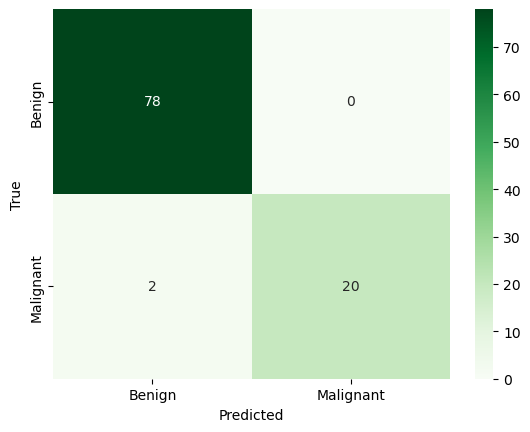

In [245]:
lr = LogisticRegression(C=0.9, solver="saga")
lr.fit(x_train_scaled, y_train)
evaluate_model(lr, x_test_scaled, y_test)

# Random Forest

Accuracy: 0.97
Precision: 0.9130434782608695
Recall: 0.9545454545454546
F1_Score: 0.9333333333333333


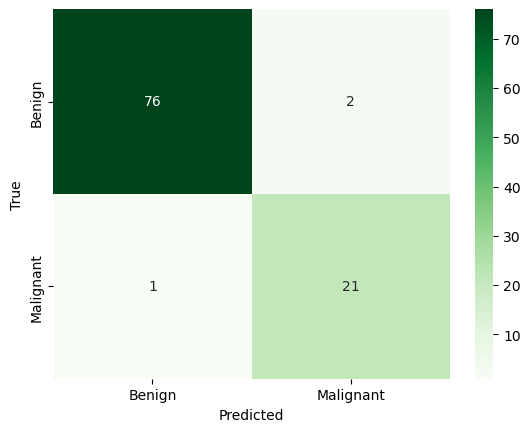

In [246]:
rf = RandomForestClassifier(n_estimators=20, max_depth=12)
rf.fit(x_train_scaled, y_train)
evaluate_model(rf, x_test_scaled, y_test)

# Support Vector Machine

Accuracy: 0.97
Precision: 0.9130434782608695
Recall: 0.9545454545454546
F1_Score: 0.9333333333333333


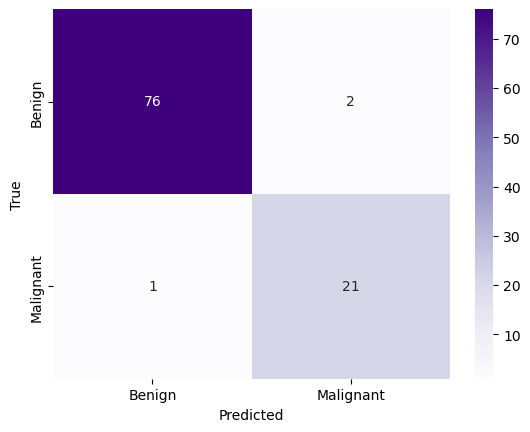

In [247]:
svm = SVC(C=0.9, kernel="linear")
svm.fit(x_train_scaled, y_train)
evaluate_model(svm, x_test_scaled, y_test)

# Neural Network

In [248]:
nn = Sequential([
    Input(shape=(x_train_scaled.shape[1],)),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(16, activation="relu"),
    BatchNormalization(),
    Dropout(0.1),

    Dense(2, activation="softmax")
])

nn.compile(
    optimizer=Adam(learning_rate=0.005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [249]:
earlyStopping = EarlyStopping(patience=3, monitor="val_loss", restore_best_weights=True)
modelCheckpoint = ModelCheckpoint(filepath="best_model.keras", monitor="val_loss", save_best_only=True, verbose=1)
lr_reduce = ReduceLROnPlateau(factor=0.1, monitor="val_loss", patience=2, verbose=1, min_lr=0.00001)

callbacks = [earlyStopping, modelCheckpoint, lr_reduce]

In [250]:
x_train_nn, x_validation_nn, y_train_nn, y_validation_nn = train_test_split(x_train_scaled, y_train, test_size=0.35, random_state=39, shuffle=True)
print(x_train_nn.shape)
print(x_validation_nn.shape)

(193, 26)
(105, 26)


In [251]:
EPC = 20
BATCH_SIZE = 16
res = nn.fit(
    x_train_nn,
    y_train_nn,
    epochs=EPC,
    validation_data=(x_validation_nn, y_validation_nn),
    batch_size=BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/20
 1/13 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.4375 - loss: 1.3146
Epoch 1: val_loss improved from inf to 0.51683, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.6222 - loss: 0.9007 - val_accuracy: 0.7524 - val_loss: 0.5168 - learning_rate: 0.0050
Epoch 2/20
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9375 - loss: 0.2389
Epoch 2: val_loss improved from 0.51683 to 0.35042, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8917 - loss: 0.3561 - val_accuracy: 0.8667 - val_loss: 0.3504 - learning_rate: 0.0050
Epoch 3/20
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9375 - loss: 0.1433
Epoch 3: val_loss improved from 0.35042 to 0.24491, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9299 - loss: 0.1951 - val_accuracy: 0.9333 - val_loss: 0.2449 - learning_rate: 0.0050
Epoch 4/20
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9375 - los

In [252]:
nn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,664 (18.22 KB)

 Trainable params: 1,522 (5.95 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 3,046 (11.90 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Accuracy: 0.97
Precision: 0.9130434782608695
Recall: 0.9545454545454546
F1_Score: 0.9333333333333333


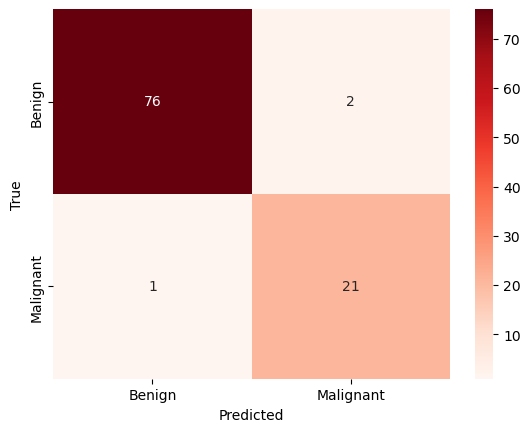

In [253]:
evaluate_model(nn, x_test_scaled, y_test, is_nn=True)

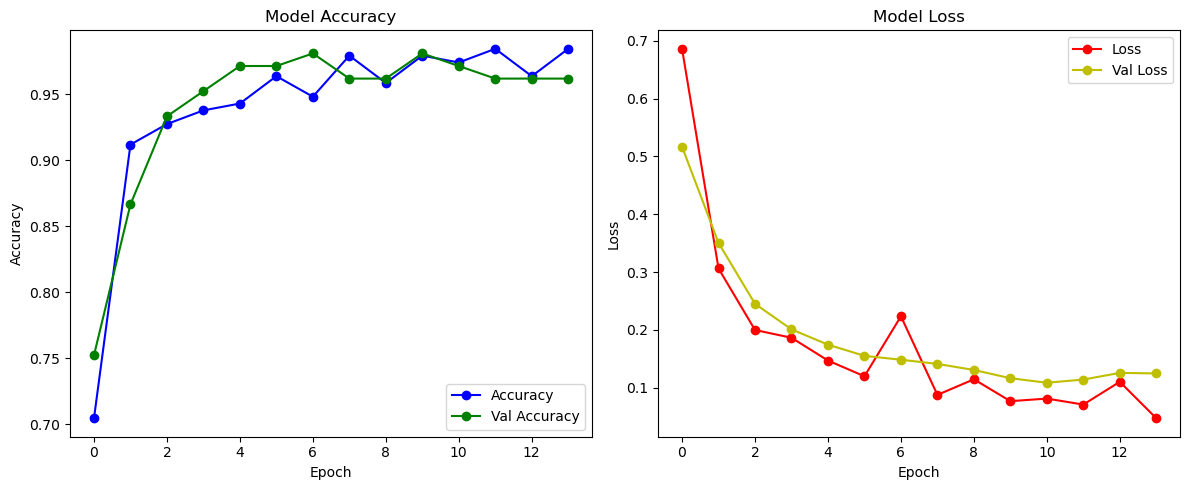

In [254]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(res.history["accuracy"], "-ob", label="Accuracy")
ax[0].plot(res.history["val_accuracy"], "-og", label="Val Accuracy")
ax[0].set_title("Model Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(res.history["loss"], "-or", label="Loss")
ax[1].plot(res.history["val_loss"], "-oy", label="Val Loss")
ax[1].set_title("Model Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.tight_layout()
plt.show()

# AdaBoost

In [255]:
def decision_stump(x, y, weights):
    n_sample, n_feature = x.shape

    best_feature = None
    best_threshold = None
    min_error = float('inf')
    best_polarity = None

    for feature in range(n_feature):
        thresholds = np.unique(x[:, feature])
        for threshold in thresholds:
            for polarity in [1, -1]:
                predictions = polarity * (x[:, feature] > threshold)
                predictions = np.where(predictions, 1, -1)
                error = np.sum(weights[y != predictions])

                if error < min_error:
                    min_error = error
                    best_feature = feature
                    best_threshold = threshold
                    best_polarity = polarity
    
    return best_feature, best_threshold, best_polarity, min_error

In [256]:
x_train_scaled.shape

(298, 26)

In [257]:
ada_y_train = y_train
ada_y_train = np.where(ada_y_train == 0, -1, 1)

In [258]:
n_sample, n_feature = x_train_scaled.shape
n_model = 200
weak_learners = []
weights = np.full(n_sample, 1/n_sample)

print(weights.shape, x_train_scaled.shape, y_train.shape)

for i in range(n_model):
    feature, threshold, polarity, error = decision_stump(x_train_scaled, ada_y_train, weights)
    alpha = 0.5 * np.log((1 - error) / max(error, 1e-10))

    predictions = polarity * (x_train_scaled[:, feature] > threshold)
    predictions = np.where(predictions, 1, -1)
    weights *= np.exp(-alpha * ada_y_train * predictions)
    weights /= np.sum(weights)

    weak_learners.append((feature, threshold, polarity, alpha))

print(weak_learners)

(298,) (298, 26) (298,)
[(4, 0.35752541670426297, 1, 1.1952979851583796), (25, 0.6636440122324706, 1, 0.8348599070961725), (15, 0.4753950873311946, 1, 0.7653833388954883), (8, -0.4779036239787642, 1, 0.562843818725466), (8, 1.224691747763527, 1, 0.5269188451248361), (18, -0.0812546999025028, 1, 0.6639937998308753), (8, 0.409073450197275, 1, 0.46944570233649185), (0, -0.48313185285137794, 1, 0.60440605478328), (18, 0.6019617718375649, 1, 0.46524527801840265), (8, 1.329852050135845, 1, 0.34033645817407365), (25, -0.4090769279379679, 1, 0.4598228138371525), (15, 1.4613565648167335, 1, 0.3655957064892167), (16, -0.9363433809250643, 1, 0.4007139142720178), (19, 0.9459136211991306, 1, 0.4064434051216427), (5, -0.9954908601134422, 1, 0.328237324271515), (8, 1.329852050135845, 1, 0.4037882953091549), (25, -0.008793049606304065, 1, 0.39076881930299506), (15, -0.3005288218871777, 1, 0.30310929276977905), (8, 1.329852050135845, 1, 0.34173170996990015), (20, -0.2044815803694967, 1, 0.4164260763069

In [259]:
def ada_predict(x, weak_learners):
    final_prediction = np.zeros(x.shape[0])
    for feature, threshold, polarity, alpha in weak_learners:
        prediction = polarity * (x[:, feature] > threshold)
        prediction = np.where(prediction, 1, -1)
        final_prediction += alpha * prediction
    return np.sign(final_prediction)

In [260]:
prediction = ada_predict(x_test_scaled, weak_learners)
prediction = np.where(prediction == -1, 0, 1)
true_count = np.sum(prediction == y_test)
print(f"From {len(x_test_scaled)}, {true_count} of them predicted correctly!")

From 100, 95 of them predicted correctly!


Accuracy: 0.95
Precision: 0.8695652173913043
Recall: 0.9090909090909091
F1_Score: 0.8888888888888888


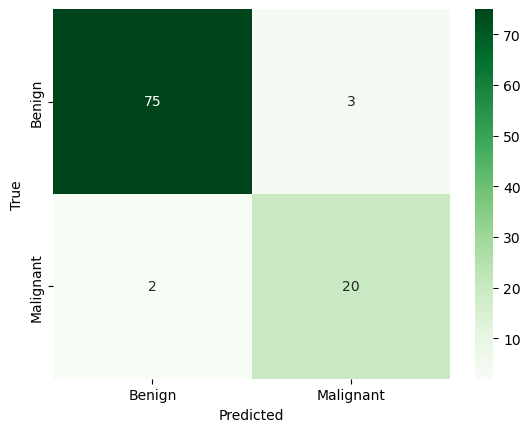

In [261]:
evaluate_model(None, x_test_scaled, y_test, False, prediction)

# Sklearn AdaBoost

d:\Software\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.97
Precision: 0.9130434782608695
Recall: 0.9545454545454546
F1_Score: 0.9333333333333333


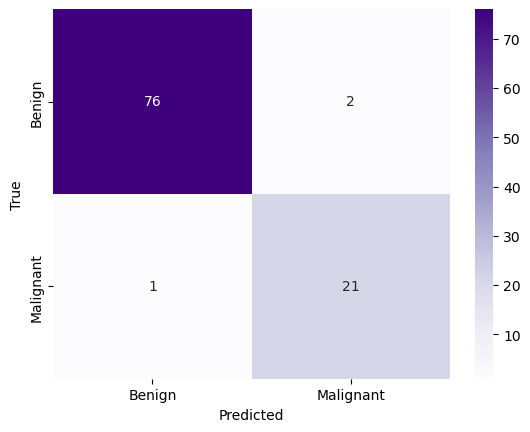

In [262]:
ada = AdaBoostClassifier(n_estimators=200)
ada.fit(x_train_scaled, y_train)
evaluate_model(ada, x_test_scaled, y_test)